In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(777) #하이퍼파라미터 튜닝을 위해 실행시 마다 변수가 같은 초기값 가지게 하기
from tensorflow.keras.utils import plot_model
import numpy as np
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝
%matplotlib inline

In [38]:
def load_time_series_data(data, sequence_length):
    #print(data.shape) #(1225, 1)
    #print(sequence_length) #3
    window_length = sequence_length + 1
    x_data = []
    y_data = []
    for i in range(0, len(data) - window_length + 1): #0 1 2 3 4 5 6 7 8 9 | 10
        window = data[i:i + window_length, :]
        x_data.append(window[:-1, :])
        y_data.append(window[-1, [-1]])
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    #print(x_data.shape) #(1222, 3, 1)
    #print(y_data.shape) #(1222, 1)

    return x_data, y_data

##########데이터 로드
df = pd.read_excel('./미세먼지 데이터.xlsx')
#df = pd.read_csv('서울시_기간별_시간평균_대기환경_정보_2020.04.csv', encoding='euc-kr')

In [39]:
print(df.head())

       측정일시  측정소명  이산화질소농도(ppm)  오존농도(ppm)  일산화탄소농도(ppm)  아황산가스(ppm)  \
0  20170101   강남구         0.040      0.002           0.8       0.005   
1  20170101  강남대로         0.082      0.005           1.4       0.007   
2  20170101   강동구         0.039      0.003           0.8       0.004   
3  20170101  강변북로         0.042      0.003           0.8       0.004   
4  20170101   강북구         0.046      0.003           1.0       0.005   

   미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)  
0       80.0        58.0  
1       83.0        58.0  
2       80.0        54.0  
3       81.0         NaN  
4       78.0        65.0  


In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79760 entries, 0 to 79759
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          79760 non-null  int64  
 1   측정소명          79760 non-null  object 
 2   이산화질소농도(ppm)  78559 non-null  float64
 3   오존농도(ppm)     78657 non-null  float64
 4   일산화탄소농도(ppm)  78490 non-null  float64
 5   아황산가스(ppm)    78573 non-null  float64
 6   미세먼지(㎍/㎥)     78109 non-null  float64
 7   초미세먼지(㎍/㎥)    77583 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.9+ MB
None


In [41]:
df['이산화질소농도(ppm)'] = df['이산화질소농도(ppm)'].fillna(df['이산화질소농도(ppm)'].mean()).astype(float)
df['오존농도(ppm)'] = df['오존농도(ppm)'].fillna(df['오존농도(ppm)'].mean()).astype(float)
df['일산화탄소농도(ppm)'] = df['일산화탄소농도(ppm)'].fillna(df['일산화탄소농도(ppm)'].mean()).astype(float)
df['아황산가스(ppm)'] = df['아황산가스(ppm)'].fillna(df['아황산가스(ppm)'].mean()).astype(float)
df['미세먼지(㎍/㎥)'] = df['미세먼지(㎍/㎥)'].fillna(df['미세먼지(㎍/㎥)'].mean()).astype(float)
df['초미세먼지(㎍/㎥)'] = df['초미세먼지(㎍/㎥)'].fillna(df['초미세먼지(㎍/㎥)'].mean()).astype(float)

In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79760 entries, 0 to 79759
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          79760 non-null  int64  
 1   측정소명          79760 non-null  object 
 2   이산화질소농도(ppm)  79760 non-null  float64
 3   오존농도(ppm)     79760 non-null  float64
 4   일산화탄소농도(ppm)  79760 non-null  float64
 5   아황산가스(ppm)    79760 non-null  float64
 6   미세먼지(㎍/㎥)     79760 non-null  float64
 7   초미세먼지(㎍/㎥)    79760 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.9+ MB
None


In [43]:
print(df.describe())

               측정일시  이산화질소농도(ppm)     오존농도(ppm)  일산화탄소농도(ppm)    아황산가스(ppm)  \
count  7.976000e+04  79760.000000  79760.000000  79760.000000  79760.000000   
mean   2.019230e+07      0.029627      0.023573      0.532549      0.003872   
std    1.401899e+04      0.027296      0.013025      0.224589      0.001517   
min    2.017010e+07      0.000000      0.000000      0.100000      0.001000   
25%    2.018072e+07      0.018000      0.014000      0.400000      0.003000   
50%    2.019101e+07      0.028000      0.022000      0.500000      0.004000   
75%    2.020112e+07      0.039000      0.032000      0.600000      0.005000   
max    2.021123e+07      6.523000      0.247000      8.000000      0.148000   

          미세먼지(㎍/㎥)    초미세먼지(㎍/㎥)  
count  79760.000000  79760.000000  
mean      40.806130     22.521545  
std       27.354762     15.291393  
min        3.000000      1.000000  
25%       24.000000     12.000000  
50%       36.000000     19.000000  
75%       51.000000     28.000000  


In [97]:
##########데이터 전처리

df = df[df['측정소명'] == '마포구']
df = df.sort_values(by='측정일시')

data = df[['미세먼지(㎍/㎥)']].to_numpy()
print(data.shape) #((720, 1)

transformer = MinMaxScaler()
data = transformer.fit_transform(data)

sequence_length = 3
x_data, y_data = load_time_series_data(data, sequence_length)
x_data = x_data.reshape(len(x_data), -1)
print(x_data.shape) #(717, 3)
print(y_data.shape) #(717, 1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, shuffle=False) #시각화를 위해 shuffle=False 옵션 사용
print(x_train.shape) #((501, 3)
print(y_train.shape) #(501, 1)
print(x_test.shape) #(216, 3)
print(y_test.shape) #(216, 1)


(1755, 1)
(1752, 3)
(1752, 1)
(1226, 3)
(1226, 1)
(526, 3)
(526, 1)


In [46]:
##########모델 생성

input = tf.keras.layers.Input(shape=(3,1))
net = tf.keras.layers.LSTM(units=32, activation='relu')(input)
net = tf.keras.layers.Dense(units=32, activation='relu')(net)
net = tf.keras.layers.Dense(units=1)(net)
model = tf.keras.models.Model(input, net)

##########모델 학습

model.compile(loss='mean_squared_error', optimizer='adam')

hist = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test)) 

##########모델 검증


Epoch 1/50
39/39 [==============================] - 1s 9ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 2/50
39/39 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0045
Epoch 3/50
39/39 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0043
Epoch 4/50
39/39 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0043
Epoch 5/50
39/39 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0042
Epoch 6/50
39/39 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0042
Epoch 7/50
39/39 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0041
Epoch 8/50
39/39 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0042
Epoch 9/50
39/39 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0040
Epoch 10/50
39/39 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0039
Epoch 11/50
39/39 [

In [47]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                4352      
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [48]:
plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


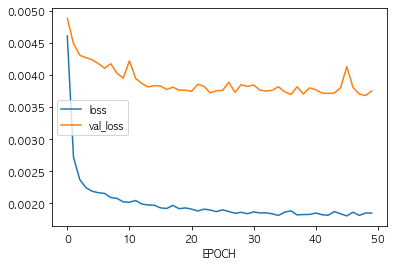

<Figure size 432x288 with 0 Axes>

In [49]:
# 학습결과 시각화
#plt.plot(hist.history['accuracy'], label='acc')
#plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel("EPOCH")
plt.legend(loc='center left')
plt.show()
plt.savefig("train_history.png")

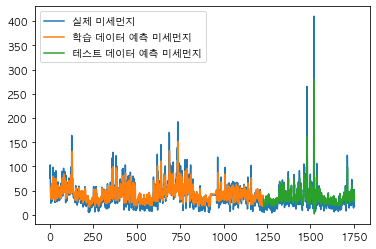

49.36399


In [50]:
##########모델 예측                           

def plot(data, y_predict_train, y_predict_test):
    plt.plot(transformer.inverse_transform(data)[:, [-1]].flatten(), label='실제 미세먼지')

    y_predict_train = transformer.inverse_transform(y_predict_train)
    y_predict_train_plot = np.empty_like(data[:, [0]])
    y_predict_train_plot[:, :] = np.nan
    y_predict_train_plot[sequence_length:len(y_predict_train) + sequence_length, :] = y_predict_train
    plt.plot(y_predict_train_plot.flatten(), label='학습 데이터 예측 미세먼지')

    y_predict_test = transformer.inverse_transform(y_predict_test)
    y_predict_test_plot = np.empty_like(data[:, [0]])
    y_predict_test_plot[:, :] = np.nan
    y_predict_test_plot[len(y_predict_train) + sequence_length:, :] = y_predict_test
    plt.plot(y_predict_test_plot.flatten(), label='테스트 데이터 예측 미세먼지')

    plt.legend()
    plt.show()

y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)
plot(data, y_predict_train, y_predict_test)

x_test = np.array([
        [44, 49, 50]
])
x_test = x_test.reshape(-1, 1)
x_test = transformer.transform(x_test)
x_test = x_test.reshape(1, sequence_length)

y_predict = model.predict(x_test)

y_predict = transformer.inverse_transform(y_predict)
print(y_predict[0][0])

In [102]:
time.ndim

1

In [103]:
data = pd.DataFrame(data=data, index=time)

In [104]:
data

,0
20170101,0.177340
20170102,0.243842
20170103,0.152709
20170104,0.110837
20170105,0.068966
...,...
20211227,0.056650
20211228,0.096059
20211229,0.118227
20211230,0.046798


In [ ]:
# 기존 전체코드

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(777) #하이퍼파라미터 튜닝을 위해 실행시 마다 변수가 같은 초기값 가지게 하기
import numpy as np
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝
%matplotlib inline

def load_time_series_data(data, sequence_length):
    #print(data.shape) #(1225, 1)
    #print(sequence_length) #3
    window_length = sequence_length + 1
    x_data = []
    y_data = []
    for i in range(0, len(data) - window_length + 1): #0 1 2 3 4 5 6 7 8 9 | 10
        window = data[i:i + window_length, :]
        x_data.append(window[:-1, :])
        y_data.append(window[-1, [-1]])
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    #print(x_data.shape) #(1222, 3, 1)
    #print(y_data.shape) #(1222, 1)

    return x_data, y_data

##########데이터 로드

df = pd.read_csv('서울시_기간별_시간평균_대기환경_정보_2020.04.csv', encoding='euc-kr')

##########데이터 분석

print(df.head())
'''
           측정일시  권역코드  권역명   측정소코드 측정소명  미세먼지 1시간(㎍/㎥)  미세먼지 24시간(㎍/㎥)  \
0  202004302300   100  도심권  111123  종로구             40              43   
1  202004302300   100  도심권  111121   중구             31              41   
2  202004302300   100  도심권  111131  용산구             41              40   
3  202004302300   101  서북권  111181  은평구             32              37   
4  202004302300   101  서북권  111201  마포구             34              34   

   초미세먼지(㎍/㎥)  오존(ppm)  이산화질소농도(ppm)  일산화탄소농도(ppm)  아황산가스농도(ppm)  
0          21    0.036         0.008           0.3         0.003  
1          22    0.037         0.010           0.3         0.003  
2          21    0.035         0.011           0.3         0.002  
3          20    0.053         0.005           0.3         0.003  
4          21    0.043         0.009           0.3         0.002  
'''

print(df.info())
'''
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   측정일시            18000 non-null  int64  
 1   권역코드            18000 non-null  int64  
 2   권역명             18000 non-null  object 
 3   측정소코드           18000 non-null  int64  
 4   측정소명            18000 non-null  object 
 5   미세먼지 1시간(㎍/㎥)   18000 non-null  int64  
 6   미세먼지 24시간(㎍/㎥)  18000 non-null  int64  
 7   초미세먼지(㎍/㎥)      18000 non-null  int64  
 8   오존(ppm)         18000 non-null  float64
 9   이산화질소농도(ppm)    18000 non-null  float64
 10  일산화탄소농도(ppm)    18000 non-null  float64
 11  아황산가스농도(ppm)    18000 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.6+ MB
None
'''

print(df.describe())
'''
              측정일시          권역코드          측정소코드  미세먼지 1시간(㎍/㎥)  \
count  1.800000e+04  18000.000000   18000.000000   18000.000000   
mean   2.020042e+11    102.240000  111211.040000      43.064389   
std    8.655959e+04      1.209331      59.935282      23.236927   
min    2.020040e+11    100.000000  111121.000000       0.000000   
25%    2.020041e+11    102.000000  111152.000000      30.000000   
50%    2.020042e+11    102.000000  111212.000000      40.000000   
75%    2.020042e+11    103.000000  111262.000000      53.000000   
max    2.020043e+11    104.000000  111311.000000     274.000000   

       미세먼지 24시간(㎍/㎥)    초미세먼지(㎍/㎥)       오존(ppm)  이산화질소농도(ppm)  일산화탄소농도(ppm)  \
count    18000.000000  18000.000000  18000.000000  18000.000000  18000.000000   
mean        42.828111     20.248889      0.035084      0.020677      0.406278   
std         17.589308     10.657195      0.015251      0.011533      0.129552   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%         32.000000     13.000000      0.026000      0.012000      0.300000   
50%         41.000000     19.000000      0.035000      0.018000      0.400000   
75%         52.000000     26.000000      0.044000      0.027000      0.500000   
max        183.000000     71.000000      0.097000      0.081000      1.100000   

       아황산가스농도(ppm)  
count  18000.000000  
mean       0.002890  
std        0.000987  
min        0.000000  
25%        0.002000  
50%        0.003000  
75%        0.003000  
max        0.017000  
'''

##########데이터 전처리

df = df[df['측정소명'] == '강남구']
df = df.sort_values(by='측정일시')

data = df[['미세먼지 1시간(㎍/㎥)']].to_numpy()
print(data.shape) #((720, 1)

transformer = MinMaxScaler()
data = transformer.fit_transform(data)

sequence_length = 3
x_data, y_data = load_time_series_data(data, sequence_length)
x_data = x_data.reshape(len(x_data), -1)
print(x_data.shape) #(717, 3)
print(y_data.shape) #(717, 1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, shuffle=False) #시각화를 위해 shuffle=False 옵션 사용
print(x_train.shape) #((501, 3)
print(y_train.shape) #(501, 1)
print(x_test.shape) #(216, 3)
print(y_test.shape) #(216, 1)

##########모델 생성

input = tf.keras.layers.Input(shape=(sequence_length,))
net = tf.keras.layers.Dense(units=32, activation='relu')(input)
net = tf.keras.layers.Dense(units=32, activation='relu')(net)
net = tf.keras.layers.Dense(units=1)(net)
model = tf.keras.models.Model(input, net)

##########모델 학습

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test)) 

##########모델 검증

##########모델 예측                           

def plot(data, y_predict_train, y_predict_test):
    plt.plot(transformer.inverse_transform(data)[:, [-1]].flatten(), label='실제 종가')

    y_predict_train = transformer.inverse_transform(y_predict_train)
    y_predict_train_plot = np.empty_like(data[:, [0]])
    y_predict_train_plot[:, :] = np.nan
    y_predict_train_plot[sequence_length:len(y_predict_train) + sequence_length, :] = y_predict_train
    plt.plot(y_predict_train_plot.flatten(), label='학습 데이터 예측 종가')

    y_predict_test = transformer.inverse_transform(y_predict_test)
    y_predict_test_plot = np.empty_like(data[:, [0]])
    y_predict_test_plot[:, :] = np.nan
    y_predict_test_plot[len(y_predict_train) + sequence_length:, :] = y_predict_test
    plt.plot(y_predict_test_plot.flatten(), label='테스트 데이터 예측 종가')

    plt.legend()
    plt.show()

y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)
plot(data, y_predict_train, y_predict_test)

x_test = np.array([
        [44, 49, 50]
])
x_test = x_test.reshape(-1, 1)
x_test = transformer.transform(x_test)
x_test = x_test.reshape(1, sequence_length)

y_predict = model.predict(x_test)

y_predict = transformer.inverse_transform(y_predict)
print(y_predict[0][0]) #51.707638